<table style="width:100%; background-color:#FFFFFF" align="left">
 <tr>
    <td style="text-align:left; background-color:#FFFFFF">
       <p>Prof. Dr. Stefan Decker <br>
        M. Slupczynski, L. Neumann, M. Kißgen, T. Holzheim</p>
        <p><strong>25-04-2025</strong></p>
     </td>
   <td style="text-align:right; background-color:#FFFFFF">
     <div>
       <img src="https://git.rwth-aachen.de/i5/teaching/dbis-raw/-/raw/main/dbis-logo.png" width="500"/>
     </div>
    </td>
 </tr>
</table>
<div class="clearfix"></div>
<center>
    <h1>Datenbanken und Informationssysteme (SoSe 2025) </h1>
    <h1>Übung 2 - ER-Diagramme und relationales Modell</h1>
</center>

<center>
    <h4>Abgabe bis 02-05-2025 14:15 Uhr</h4>
    <strong>Zu spät eingereichte Übungen werden nicht berücksichtigt.</strong>
</center>

<div class="hidden-print"><hr />
<h3> Wichtige Hinweise</h3>
<ul>
<li>Bei Nichtbeachtung dieser Hinweise wird die Abgabe mit 0 Punkten bewertet!</li>
<li>Bitte laden Sie Ihre digitalen Lösungen mit diesem Notebook ins Moodle hoch.</li>
<li>Bitte geben Sie Namen, Matrikelnummern auf der schriftlichen Lösung an.</li>
</ul></div>

<strong>Die Lösung zu diesem Übungsblatt wird in den Übungen am 2. Mai und 5. Mai vorgestellt. <br /> 
Bitte beachten Sie auch die aktuellen Ankündigungen im Moodle-Lernraum zur Vorlesung. </strong> <br />
<em>* bezeichnet Bonusaufgaben.</em>
<hr />

<h3>Dokumentations-Notebook</h3>
Wir empfehlen ihnen das zu dieser Übung zugehörige Dokumentations-Notebook zu lesen. Zusätzlich zur der Handhabung der verschiedenen verwendeten Tools werden dort zentrale Konzepte der Vorlesung noch einmal wiederholt. Sie finden das Notebook im <a href="https://moodle.rwth-aachen.de/course/view.php?id=48593">Moodle Lernraum</a>.

<h3>Abgabegruppe</h3>
Es ist möglich die Abgabe in Gruppen von bis zu fünf Personen zu bearbeiten. <strong>Jeder Gruppenteilnehmer muss für sich ein Notebook hochladen</strong>. Wenn Sie in einer Abgabegruppe arbeiten, dürfen die Notebooks der Gruppenteilnehmer den gleichen Inhalt aufweisen. Wenn Sie in einer Gruppe arbeiten, tragen Sie hier bitte alle Gruppenteilnehmer inklusive sich selbst ein. <strong>Eine inkonsistente Angabe von Gruppenmitgliedern bei den Teilnehmern führt im Zweifel zu 0 Punkten für alle Gruppenteilnehmer!</strong> Es ist möglich zwischen den Abgaben die Gruppen zu wechseln.

<h4>Andere Gruppenteilnehmer (Wenn Einzelabgabe, bitte leer lassen)</h4>
<ul>
    <li>Neo Ahrens, 456647</li>
    <li>Yorck Heilmann, 456599</li>
    <li>Christian Bick, 456513</li>
    <li>Name, Matr. Nr.</li>
    <li>Name, Matr. Nr.</li>
</ul>

<div class="alert alert-info hidden-print">Die folgende Codezelle sollte zu Beginn der Bearbeitung der Übung ausgeführt werden. <br /> Am Ende sollte <b>"OK, es kann los gehen!"</b> stehen. Dies kann ein paar Minuten dauern.</div>
<div class="alert alert-danger">
    Sie sollten die weiteren Zellen erst ausführen, wenn <b>"OK, es kann los gehen!"</b> am Ende der Ausgabe der nächsten Zelle steht. <br /> Andere Ausgaben dieser Zelle können ignoriert werden. <br />
</div>

In [5]:
%pip install "dbis-er-diagram~=1.1.1" "dbis-exc-manager~=1.0.2" "dbis-relational-model~=1.0.3"
import warnings
try: 
    # import libraries
    from erdiagram import ER
    from erdiagram import *
    from excmanager.Task import Exercise, Task, SubTask
    from IPython.display import display, HTML
    from dbis_relational_model import RM, Relation, Intersection, ProjectedRelation, Subset
    # initialize task structure
    exc = Exercise( 2 )
    task1 = Task( exc, "2.1" )
    task2 = Task( exc, "2.2" )
    tasks_ready = {"2.1": {}, "2.2": {}}
except Exception as e:
    display(HTML(f"<div class='alert alert-danger'><h2>Etwas ist beim import schief gelaufen:</h1>{e}</div>"))
else:
    display(HTML("<div class='alert alert-success'><h1>OK, es kann los gehen!</h1></div>"))
    

Note: you may need to restart the kernel to use updated packages.


<hr />

<div class="pull-left">

<h2> Aufgabe 2.1 (ER-Diagramm Spezialisierungen) </h2>

</div>

<div class="pull-right">

<h3> (10 Punkte) </h3>

</div>

Entwerfen Sie zu der folgenden textuellen Beschreibung ein Entity-Relationship-Modell.   
Verwenden Sie zur Beschreibung der Kardinalitäten die `(min, max)`-Notation.

* `Bibliothek`en verfügen über einen `Name`n und werden durch ein `Bibliothekssigel` eindeutig identifiziert.
* Ein `Angestellter` besitzt eine eindeutige `Personalnummer`, einen `Name`n und wird von genau einer Bibliothek `beschäftigt`. Eine Bibliothek hingegen kann höchstens 100 und mindestens einen Angestellten haben.
* Jede Bibliothek `besteht aus` mindestens eine und höchstens 10 `Abteilung`en. Innerhalb einer Bibliothek werden Abteilungen eindeutig über die `AbteilungsId` identifiziert. Weiterhin hat jede Abteilungen eine `Bezeichnung`.
* Um Abteilungen zu pflegen, werden ihnen Angestellte `zugeteilt`. Jede Abteilung hat mindestens einen und maximal 20 zugeteilte Angestellte. Jeder Angestellte kümmert sich um eine bis maximal drei Abteilungen.
* Ein `Buch` verfügt über eine eindeutige `ISBN` (International Standard Book Number), einen `Titel` und mehrere `Autor`en. Die Mehrheit der Bücher lässt sich in die Kategorien `Science-Fiction`, `Sachbuch` und `Roman` unterteilen. Allerdings passt nicht jedes Buch in eine dieser Kategorien und die Klassen sind nicht disjunkt.
* Jedes Buch `lagert` in genau einer Abteilung, wobei in jeder Abteilung mindestens 1000 Bücher lagern.  
* `Kunde`n der Bibliothek werden durch eine `KundenId` eindeutig identifiziert und besitzen eine `E-Mail-Adresse`. Jede Bibliothek bietet ihren Kunden die Möglichkeit, Bücher zu `reservieren`. Dabei kann jedes Buch höchstens einmal gleichzeitig reserviert werden und jeder Kunde nur höchstens 5 Bücher gleichzeitig reservieren. Zu jeder Reservierung wird die `Dauer` und das `Reservierungsdatum` gespeichert.
* Zusätzlich kann ein Kunde ein Buch `ausleihen`, wobei zu jeder Ausleihe die `Vertragsnummer` sowie der monetäre `Betrag` gespeichert werden. Auch hier kann ein Buch höchstens einmal gleichzeitig ausgeliehen werden, jedoch kann jeder Kunde beliebig viele Bücher ausleihen.
* Für den Fall, dass ein Buch nicht rechtzeitig zurückgegeben wird, wird einem Kunden eine `Strafe` zugeordnet. Für jede Strafe werden die `Rechnungssumme` sowie die eindeutige `Rechnungsnummer` gespeichert. Jede Strafe wird genau einem Kunden `zugeordnet`, während ein Kunde beliebig viele Strafen sammeln kann.

**Hinweis**: 
* Benennen Sie die im Text genannten Entity-Typen und Beziehungen genau wie angegeben. Benutzen Sie für die Namen der Entity-Typen stets den Singular.
* Die Klammern der `(min, max)`-Notation sind notwendig.
* Beim Implementieren der Aufgabe sollten Sie sicherstellen, dass Sie die `NotImplementedError` Exception auskommentieren oder löschen.
* *Aus Gründen der besseren Lesbarkeit wird bei Personenbezeichnungen und personenbezogenen Hauptwörtern die männliche Form verwendet. Entsprechende Begriffe gelten im Sinne der Gleichbehandlung grundsätzlich für alle Geschlechter. Die verkürzte Sprachform beinhaltet keine Wertung. Benutzen Sie bitte die vorgegebenen und hervorgehobenen Entitäts- und Attributsnamen, um die automatische Korrektur zu ermöglichen.*

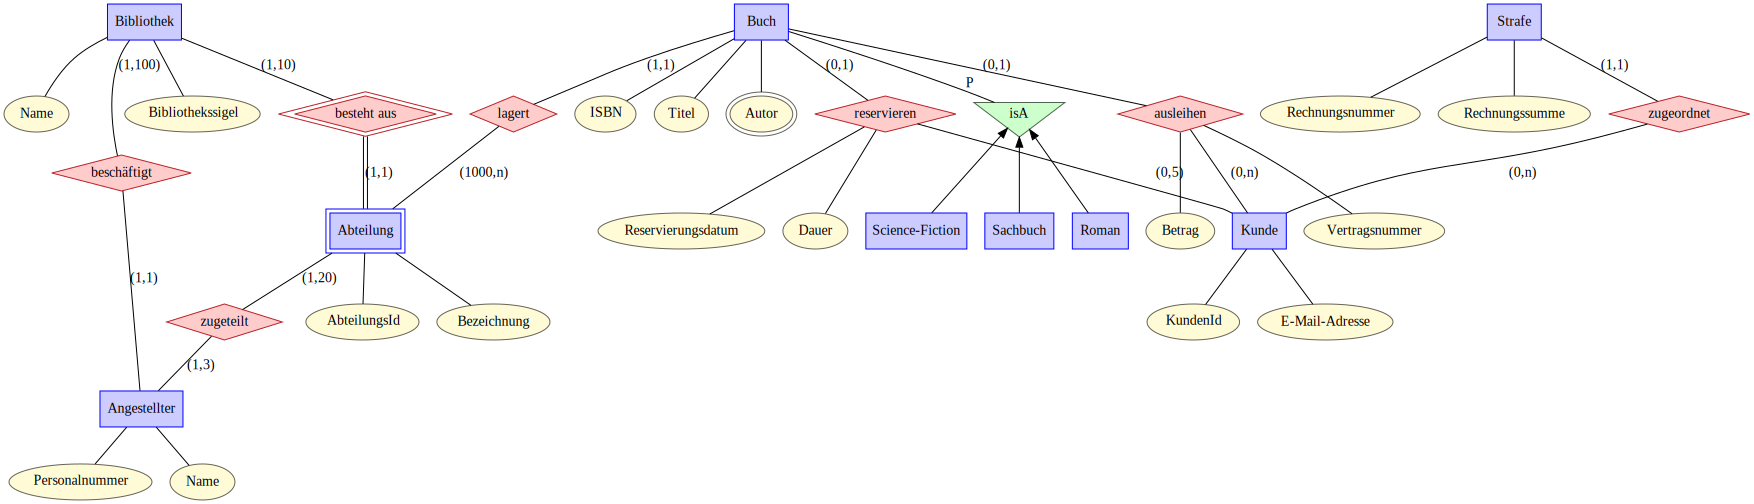

In [6]:

g = ER()

# IHR CODE HIER
g.add_attribute("Bibliothek", "Name")
g.add_attribute("Bibliothek", "Bibliothekssigel", is_pk=True)


g.add_entity("Angestellter")
g.add_attribute("Angestellter", "Personalnummer", is_pk=True)
g.add_attribute("Angestellter", "Name")

g.add_relation({"Bibliothek": "(1,100)"}, "beschäftigt", {"Angestellter": "(1,1)"})

g.add_relation(
    {
        "Bibliothek": "(1,10)"
    },
    "besteht aus",
    {
        "Abteilung": {
            "cardinality": "(1,1)",
            "is_weak":True # Hier wird die Relation schwach angebunden
        }
    }
)
g.add_attribute("Abteilung", "AbteilungsId", is_pk=True)
g.add_attribute("Abteilung", "Bezeichnung")

g.add_relation({"Abteilung": "(1,20)"}, "zugeteilt", {"Angestellter": "(1,3)"})

g.add_attribute("Buch", "ISBN", is_pk=True)
g.add_attribute("Buch", "Titel")
g.add_attribute("Buch", "Autor", is_multiple=True)

g.add_is_a("Buch", ["Science-Fiction", "Sachbuch", "Roman"], is_total=False, is_disjunct=False)

g.add_relation({"Buch": "(1,1)"}, "lagert", {"Abteilung": "(1000,n)"})

g.add_attribute("Kunde", "KundenId", is_pk=True)
g.add_attribute("Kunde", "E-Mail-Adresse")


g.add_relation({"Buch": "(0,1)"}, "reservieren", {"Kunde": "(0,5)"})
g.add_attribute("reservieren", "Dauer")
g.add_attribute("reservieren", "Reservierungsdatum")
#g.add_relation({"Buch": "(0,1)"},
 #   "reservieren",
  #  {
   #     "Kunde":1,
    #    "Bibliothek": "(0,5)"
    #})
    
g.add_relation({"Buch": "(0,1)"}, "ausleihen", {"Kunde": "(0,n)"})
g.add_attribute("ausleihen", "Vertragsnummer")
g.add_attribute("ausleihen", "Betrag")

g.add_relation({"Strafe": "(1,1)"}, "zugeordnet", {"Kunde": "(0,n)"})
g.add_attribute("Strafe", "Rechnungssumme")
g.add_attribute("Strafe", "Rechnungsnummer", is_pk=True)

# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 PUNKTE

subtask = SubTask(task1, "a", points=10)
g.display()

# Syntaxcheck
tasks_ready[subtask.task.task][subtask.subtask] = True

if not len(g.get_entities()) == 9:
    warnings.warn(f"Es werden 9 Entitäten erwartet. Ist: {len(g.get_entities())}")
    tasks_ready[subtask.task.task][subtask.subtask] = False

if not len(g.get_attributes()) == 17:
    warnings.warn(f"Es werden 17 Attribute erwartet. Ist: {len(g.get_attributes())}")
    tasks_ready[subtask.task.task][subtask.subtask] = False
    
if not len(g.get_relations()) == 7:
    warnings.warn(f"Es werden 7 Relationen erwartet. Ist: {len(g.get_relations())}")
    tasks_ready[subtask.task.task][subtask.subtask] = False

subtask.setSolution(g.as_solution())
subtask.setData(g)

In [ ]:
# Autograder, bitte ignorieren.


<div class="pull-left">

<h2> Aufgabe 2.2 (Relationales Datenmodell) </h2>

</div>

<div class="pull-right">

<h3> (10 Punkte) </h3>

</div>

Geben Sie eine Umsetzung des folgenden ER-Diagramms in ein relationales Datenbankschema an. Bitte gruppieren Sie Ihre Lösung in Relationen und interrelationale Abhängigkeiten. Wir empfehlen ihnen das zu dieser Aufgabe zugehörige Dokumentations-Notebook zu lesen. Sie finden das *Doku-Relational-Model.ipnyb* Notebook im <a href="https://moodle.rwth-aachen.de/course/view.php?id=48593">Moodle Lernraum</a>.


**Hinweise**: 
* Verwenden Sie in den von Ihnen definierten Relationen die im Diagramm angegebenen Attributnamen.   
* Stammt ein Attribut von einem anderen Entity-Typen, beispielsweise als Sekundärschlüssel, benennen Sie es bitte `Entitytyp_Attribut`, um zu kennzeichnen, von welcher Entität das Attribut stammt. (Beispiel: `Angestellter_Personalnummer`)
* Für die leere Menge benutzen Sie `None`.  
* Integrieren Sie bei der Übersetzung einer 1:n-Beziehung die Beziehung in die entsprechende Relation.
* Zerlegen Sie zusammengesetzte Attribute bei der Übersetzung.
* Verzichten Sie bei der Übersetzung von disjunkten IsA-Beziehungen auf eine einzige Tabelle für den Supertypen.
* Wenn ein Attribut durch eine eigene Relation dargestellt wird, bennen Sie die Relation wie das Attribut. Falls der Name des Attributes Leerzeichen beinhaltet, entfernen sie diese.
* Übersetzen Sie eine Spezialisierung gemäß der totalen Eigenschaft.
* Beim Implementieren der Aufgabe sollten Sie sicherstellen, dass Sie die NotImplementedError Exception auskommentieren oder löschen.

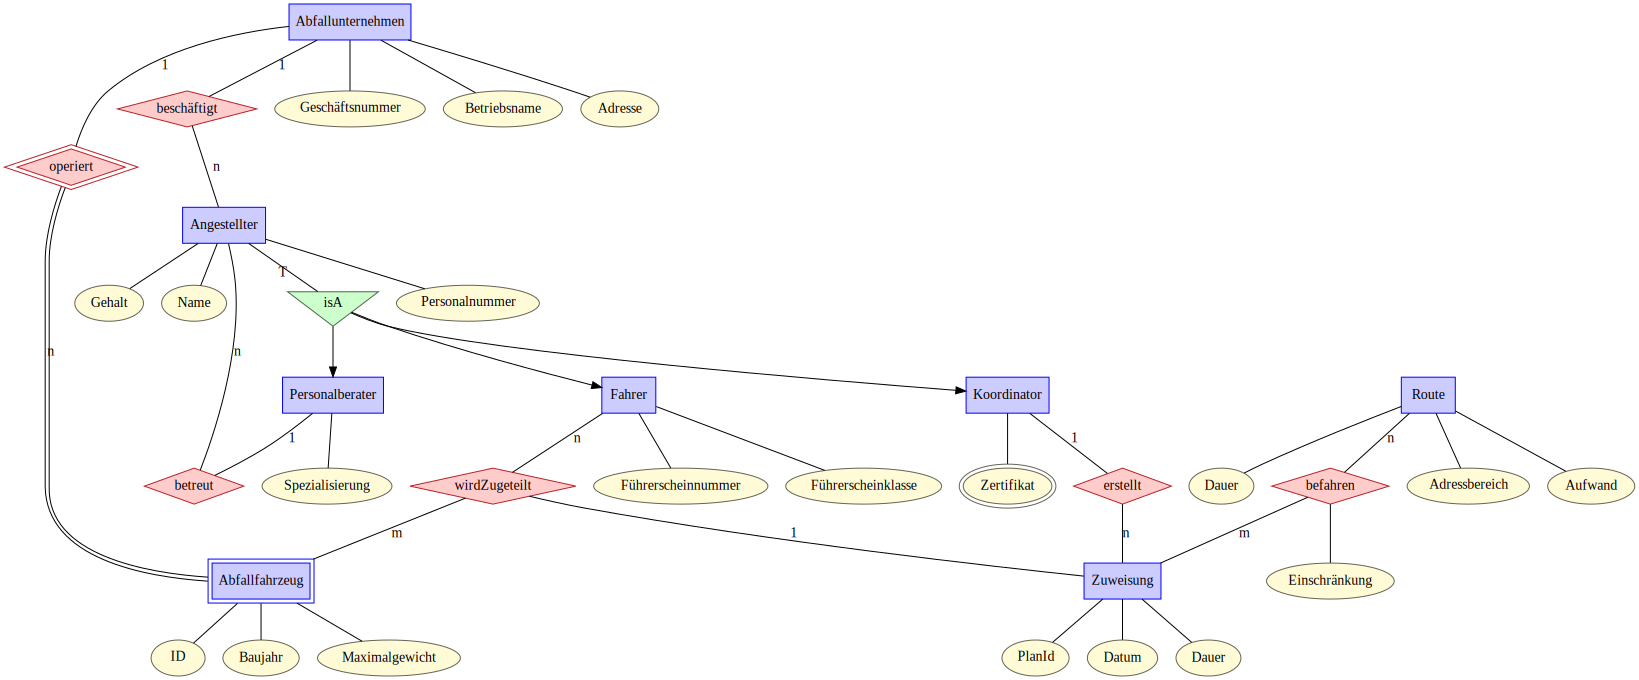

In [7]:
# Diese Code-Zelle ist Teil der Aufgabenstellung und sollte somit nicht verändert werden. 
g = ER()

g.add_entity("Abfallunternehmen")
g.add_entity("Abfallfahrzeug", is_weak=True)
g.add_entity("Angestellter")
g.add_entity("Fahrer")
g.add_entity("Personalberater")
g.add_entity("Koordinator")
g.add_entity("Zuweisung")
g.add_entity("Route")

g.add_attribute("Abfallunternehmen", "Geschäftsnummer", is_pk=True)
g.add_attribute("Abfallunternehmen", "Betriebsname")
g.add_attribute("Abfallunternehmen", "Adresse")
g.add_attribute("Abfallfahrzeug", "ID", is_pk=True, is_weak=True)
g.add_attribute("Abfallfahrzeug", "Baujahr")
g.add_attribute("Abfallfahrzeug", "Maximalgewicht")
g.add_attribute("Angestellter", "Personalnummer", is_pk=True)
g.add_attribute("Angestellter", "Gehalt")
g.add_attribute("Angestellter", "Name")
g.add_attribute("Fahrer", "Führerscheinnummer")
g.add_attribute("Fahrer", "Führerscheinklasse")
g.add_attribute("Koordinator", "Zertifikat", is_multiple=True)
g.add_attribute("Personalberater", "Spezialisierung")
g.add_attribute("Route", "Adressbereich", is_pk=True)
g.add_attribute("Route", "Aufwand")
g.add_attribute("Route", "Dauer")
g.add_attribute("Zuweisung", "PlanId", is_pk=True)
g.add_attribute("Zuweisung", "Datum")
g.add_attribute("Zuweisung", "Dauer")

g.add_relation({"Abfallunternehmen": "1"}, "operiert", {"Abfallfahrzeug": {"cardinality": "n", "is_weak": True}})
g.add_relation({"Abfallunternehmen": "1"}, "beschäftigt", {"Angestellter": "n"})
g.add_relation({"Personalberater": "1"}, "betreut", {"Angestellter": "n"})
g.add_relation({"Koordinator": "1"}, "erstellt", {"Zuweisung": "n"})
g.add_relation({"Fahrer": "n"}, "wirdZugeteilt", {"Zuweisung": "1", "Abfallfahrzeug": {"cardinality": "m"}})
g.add_relation({"Route": "n"}, "befahren", {"Zuweisung": "m"})
g.add_attribute("befahren", "Einschränkung")
g.add_is_a("Angestellter", ["Koordinator", "Personalberater", "Fahrer"], is_total=True, is_disjunct=True)

g.display()


In [8]:
g = RM()
#g.add_attribute("Abfallunternehmen", "Geschäftsnummer", is_pk=True)
#g.add_attribute("Abfallunternehmen", "Betriebsname")
#g.add_attribute("Abfallunternehmen", "Adresse")
g.addRelation(Relation("Abfallunternehmen", ["Geschäftsnummer"], ["Betriebsname", "Adresse"])) #


#g.add_attribute("Abfallfahrzeug", "ID", is_pk=True, is_weak=True)
#g.add_attribute("Abfallfahrzeug", "Baujahr")
#g.add_attribute("Abfallfahrzeug", "Maximalgewicht")
g.addRelation(Relation("Abfallfahrzeug", ["ID", "Abfallunternehmen_Geschäftsnummer"], ["Baujahr", "Maximalgewicht"])) #


#g.add_attribute("Angestellter", "Personalnummer", is_pk=True)
#g.add_attribute("Angestellter", "Gehalt")
#g.add_attribute("Angestellter", "Name")
#g.addRelation(Relation("Angestellter", ["Personalnummer"], ["Gehalt", "Name", "Abfallunternehmen_Geschäftsnummer", "Personalberater_Angestellter_Personalnummer"])) #


#g.add_attribute("Fahrer", "Führerscheinnummer")
#g.add_attribute("Fahrer", "Führerscheinklasse")
g.addRelation(Relation("Fahrer", ["Personalnummer"], ["Gehalt", "Name", "Abfallunternehmen_Geschäftsnummer", "Führerscheinnummer", "Führerscheinklasse", "Personalberater_Personalnummer"]))#


#g.add_attribute("Koordinator", "Zertifikat", is_multiple=True)
g.addRelation(Relation("Koordinator", ["Personalnummer"], ["Gehalt", "Name", "Abfallunternehmen_Geschäftsnummer", "Personalberater_Personalnummer"]))#
g.addRelation(Relation("Koordinator_Zertifikat", ["Koordinator_Personalnummer", "Zertifikat"], []))#
g.addDependency(Subset(ProjectedRelation("Koordinator_Zertifikat", ["Koordinator_Personalnummer"]), ProjectedRelation("Koordinator", ["Personalnummer"])))#


#g.add_attribute("Personalberater", "Spezialisierung")
g.addRelation(Relation("Personalberater", ["Personalnummer"], ["Gehalt", "Name", "Abfallunternehmen_Geschäftsnummer", "Spezialisierung", "Personalberater_Personalnummer"]))#


#g.add_attribute("Route", "Adressbereich", is_pk=True)
#g.add_attribute("Route", "Aufwand")
#g.add_attribute("Route", "Dauer")
g.addRelation(Relation("Route", ["Adressbereich"], ["Aufwand", "Dauer"]))#


#g.add_attribute("Zuweisung", "PlanId", is_pk=True)
#g.add_attribute("Zuweisung", "Datum")
#g.add_attribute("Zuweisung", "Dauer")
g.addRelation(Relation("Zuweisung", ["PlanId"], ["Datum", "Dauer", "Koordinator_Personalnummer"]))#


#g.add_relation({"Abfallunternehmen": "1"}, "operiert", {"Abfallfahrzeug": {"cardinality": "n", "is_weak": True}})
g.addDependency(Subset(ProjectedRelation("Abfallfahrzeug", ["Abfallunternehmen_Geschäftsnummer"]), ProjectedRelation("Abfallunternehmen", ["Geschäftsnummer"]))) #/


#g.add_relation({"Abfallunternehmen": "1"}, "beschäftigt", {"Angestellter": "n"})
g.addDependency(Subset(ProjectedRelation("Fahrer", ["Abfallunternehmen_Geschäftsnummer"]), ProjectedRelation("Abfallunternehmen", ["Geschäftsnummer"])))#
g.addDependency(Subset(ProjectedRelation("Koordinator", ["Abfallunternehmen_Geschäftsnummer"]), ProjectedRelation("Abfallunternehmen", ["Geschäftsnummer"])))#
g.addDependency(Subset(ProjectedRelation("Personalberater", ["Abfallunternehmen_Geschäftsnummer"]), ProjectedRelation("Abfallunternehmen", ["Geschäftsnummer"])))#


#g.add_relation({"Personalberater": "1"}, "betreut", {"Angestellter": "n"})
g.addDependency(Subset(ProjectedRelation("Fahrer", ["Personalberater_Personalnummer"]), ProjectedRelation("Personalberater", ["Personalnummer"])))#
g.addDependency(Subset(ProjectedRelation("Koordinator", ["Personalberater_Personalnummer"]), ProjectedRelation("Personalberater", ["Personalnummer"])))#
g.addDependency(Subset(ProjectedRelation("Personalberater", ["Personalberater_Personalnummer"]), ProjectedRelation("Personalberater", ["Personalnummer"])))#


#g.add_relation({"Koordinator": "1"}, "erstellt", {"Zuweisung": "n"})
g.addDependency(Subset(ProjectedRelation("Zuweisung", ["Koordinator_Personalnummer"]), ProjectedRelation("Koordinator", ["Personalnummer"])))#


#g.add_relation({"Fahrer": "n"}, "wirdZugeteilt", {"Zuweisung": "1", "Abfallfahrzeug": {"cardinality": "m"}})
g.addRelation(Relation("WirdZugeteilt", ["Fahrer_Personalnummer", "Abfallfahrzeug_ID"], ["Zuweisung_PlanId"])) #
g.addDependency(Subset(ProjectedRelation("WirdZugeteilt", ["Fahrer_Personalnummer"]), ProjectedRelation("Fahrer", ["Personalnummer"]))) #
g.addDependency(Subset(ProjectedRelation("WirdZugeteilt", ["Abfallfahrzeug_ID"]), ProjectedRelation("Abfallfahrzeug", ["ID"]))) #
g.addDependency(Subset(ProjectedRelation("WirdZugeteilt", ["Zuweisung_PlanId"]), ProjectedRelation("Zuweisung", ["PlanId"]))) #


#g.add_relation({"Route": "n"}, "befahren", {"Zuweisung": "m"})
#g.add_attribute("befahren", "Einschränkung")
g.addRelation(Relation("Befahren", ["Route_Adressbereich", "Zuweisung_PlanId"], ["Einschränkung"]))
g.addDependency(Subset(ProjectedRelation("Befahren", ["Zuweisung_PlanId"]), ProjectedRelation("Zuweisung", ["PlanId"])))
g.addDependency(Subset(ProjectedRelation("Befahren", ["Route_Adressbereich"]), ProjectedRelation("Route", ["Adressbereich"])))


#g.add_is_a("Angestellter", ["Koordinator", "Personalberater", "Fahrer"], is_total=True, is_disjunct=True)
g.addDependency(Intersection(ProjectedRelation("Fahrer", ["Personalnummer"]), ProjectedRelation("Kooridnator", ["Personalnummer"]), None))
g.addDependency(Intersection(ProjectedRelation("Fahrer", ["Personalnummer"]), ProjectedRelation("Personalberater", ["Personalnummer"]), None))
g.addDependency(Intersection(ProjectedRelation("Kooridnator", ["Personalnummer"]), ProjectedRelation("Personalberater", ["Personalnummer"]), None))


# Diesen Teil nicht verändern, sonst gibt es 0 Punkte!

subtask = SubTask(task2, "a", points=10)
g.display()
     
# Syntaxcheck
tasks_ready[subtask.task.task][subtask.subtask] = True

if not g.getNumDependencies() == 17:
    warnings.warn(f"Es werden 17 interrelationale Abhängigkeiten erwartet, ist: {g.getNumDependencies()}")
    tasks_ready[subtask.task.task][subtask.subtask] = False

if not g.getNumRelations() == 10:
    warnings.warn(f"Es werden 10 Relationen erwartet, ist: {g.getNumRelations()}")
    tasks_ready[subtask.task.task][subtask.subtask] = False
           
subtask.setData(g)

Abfallunternehmen(<u>Geschäftsnummer</u>, Betriebsname, Adresse)

Abfallfahrzeug(<u>ID</u>, <u>Abfallunternehmen_Geschäftsnummer</u>, Baujahr, Maximalgewicht)

Fahrer(<u>Personalnummer</u>, Gehalt, Name, Abfallunternehmen_Geschäftsnummer, Führerscheinnummer, Führerscheinklasse, Personalberater_Personalnummer)

Koordinator(<u>Personalnummer</u>, Gehalt, Name, Abfallunternehmen_Geschäftsnummer, Personalberater_Personalnummer)

Koordinator_Zertifikat(<u>Koordinator_Personalnummer</u>, <u>Zertifikat</u>)

Personalberater(<u>Personalnummer</u>, Gehalt, Name, Abfallunternehmen_Geschäftsnummer, Spezialisierung, Personalberater_Personalnummer)

Route(<u>Adressbereich</u>, Aufwand, Dauer)

Zuweisung(<u>PlanId</u>, Datum, Dauer, Koordinator_Personalnummer)

WirdZugeteilt(<u>Fahrer_Personalnummer</u>, <u>Abfallfahrzeug_ID</u>, Zuweisung_PlanId)

Befahren(<u>Route_Adressbereich</u>, <u>Zuweisung_PlanId</u>, Einschränkung)

Koordinator_Zertifikat[Koordinator_Personalnummer] ⊆ Koordinator[Personalnummer]

Abfallfahrzeug[Abfallunternehmen_Geschäftsnummer] ⊆ Abfallunternehmen[Geschäftsnummer]

Fahrer[Abfallunternehmen_Geschäftsnummer] ⊆ Abfallunternehmen[Geschäftsnummer]

Koordinator[Abfallunternehmen_Geschäftsnummer] ⊆ Abfallunternehmen[Geschäftsnummer]

Personalberater[Abfallunternehmen_Geschäftsnummer] ⊆ Abfallunternehmen[Geschäftsnummer]

Fahrer[Personalberater_Personalnummer] ⊆ Personalberater[Personalnummer]

Koordinator[Personalberater_Personalnummer] ⊆ Personalberater[Personalnummer]

Personalberater[Personalberater_Personalnummer] ⊆ Personalberater[Personalnummer]

Zuweisung[Koordinator_Personalnummer] ⊆ Koordinator[Personalnummer]

WirdZugeteilt[Fahrer_Personalnummer] ⊆ Fahrer[Personalnummer]

WirdZugeteilt[Abfallfahrzeug_ID] ⊆ Abfallfahrzeug[ID]

WirdZugeteilt[Zuweisung_PlanId] ⊆ Zuweisung[PlanId]

Befahren[Zuweisung_PlanId] ⊆ Zuweisung[PlanId]

Befahren[Route_Adressbereich] ⊆ Route[Adressbereich]

Fahrer[Personalnummer] ∩ Kooridnator[Personalnummer] = EMPTY

Fahrer[Personalnummer] ∩ Personalberater[Personalnummer] = EMPTY

Kooridnator[Personalnummer] ∩ Personalberater[Personalnummer] = EMPTY

In [ ]:
# Autograder, bitte ignorieren

# Zusammenfassung

Die folgende Codezelle erlaubt es, die Teilaufgaben 2.1 und 2.2 auf syntaktische Korrektheit (z.B. falsche Assertions oder Tippfehler) zu prüfen. Bitte benutzen Sie diese Codezelle, um Ihre Abgaben zu überprüfen.  
Die Punktzahlangaben in dieser Codezelle dienen nur der Orientierung und geben die **maximal erreichbaren** Punkte an, nicht die tatsächlich erreichten. 

In [4]:
tasks = ["2.1", "2.2"]
points = 0
for t in tasks:
    display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe {t}:</h4></div>"))

    task = exc.getTaskByLabel(t)
    subtasks = task.getSubtasks()
    for i in subtasks:
        display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe {t}{subtasks[i].subtask}):</h4></div>"))
        try:
            subTaskGraph = subtasks[i].getData()
        except Exception as e:
            display(HTML(f"<div class='alert alert-danger'> Teilaufgabe {t}{subtasks[i].subtask}) wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Warnings. </div>"))
            continue
        else:
            if not tasks_ready[subtasks[i].task.task][subtasks[i].subtask]:
                display(HTML(f"<div class='alert alert-danger'> Teilaufgabe {t}{subtasks[i].subtask}) wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Warnings. </div>"))
                continue
            points += subtasks[i].getPoints()
            display(HTML(f"<div class='alert alert-success'> ... BEARBEITET (+max. {subtasks[i].getPoints()} Punkte) </div>"))

display(HTML(f"<div class='alert alert-success'><h3>Es wurden insgesamt Teilaufgaben für max. {points}/20 Punkte gefunden.</h3></div><hr />"))